In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
Insurance_Data = pd.read_csv('C:/Users/lbhatt/Documents/Projects/Paypal/Paypal Jan/carInsurance_train.csv')

In [4]:
Insurance_test = pd.read_csv('C:/Users/lbhatt/Documents/Projects/Paypal/Paypal Jan/carInsurance_test.csv')

In [5]:
Insurance_Data.shape

(4000, 19)

In [6]:
Insurance_test.shape

(1000, 19)

In [7]:
Insurance_Data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [9]:
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB


In [10]:
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [11]:
Insurance_Data.describe(include='object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,15:27:56,10:52:24
freq,893,2304,1988,2831,1049,437,3,3


# Vizualizing the data

In [12]:
imp_feats = ['CarInsurance','Age','Balance','HHInsurance','CarLoan','NoOfContacts','DaysPassed',
            'PrevAttempts']

C:\Users\lbhatt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\lbhatt\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


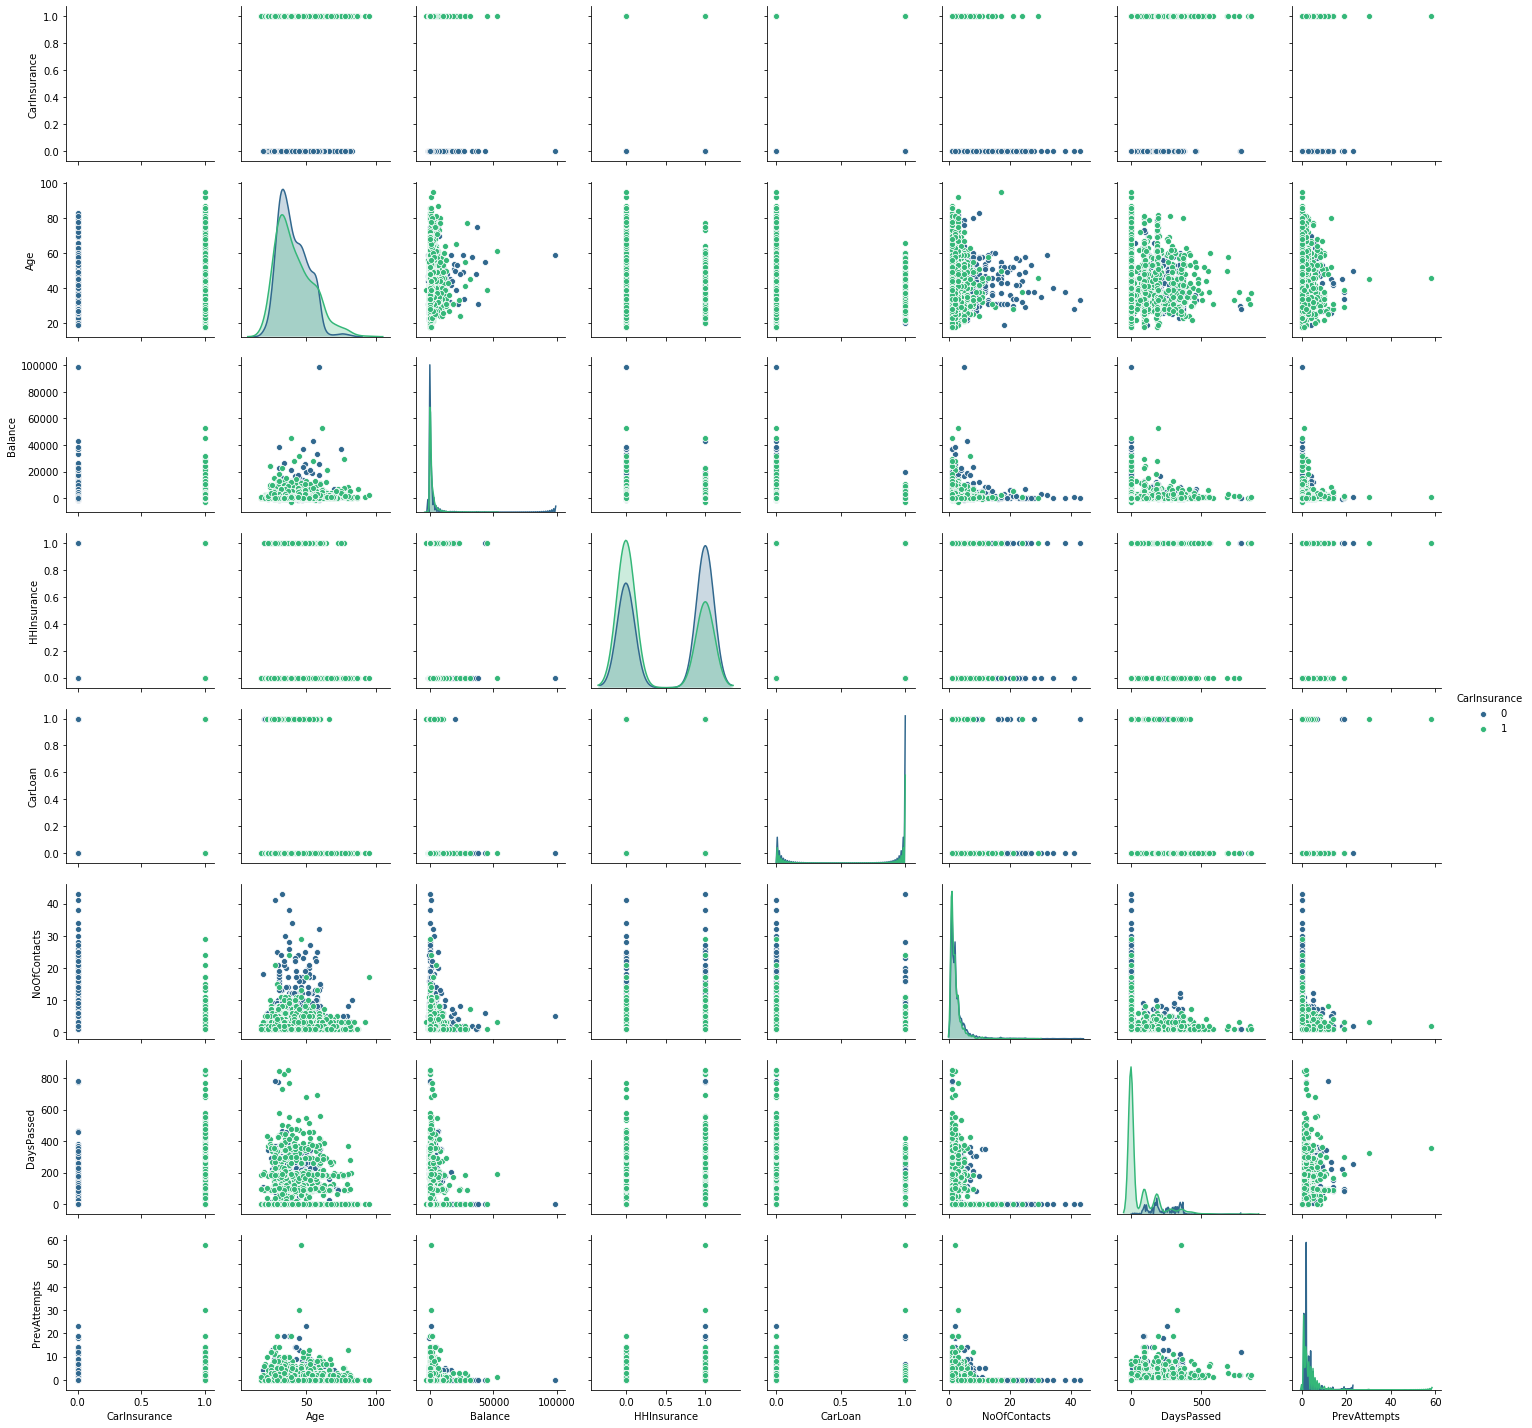

In [14]:
sns.pairplot(Insurance_Data[imp_feats], hue='CarInsurance', palette='viridis',size=2.5)
plt.show()

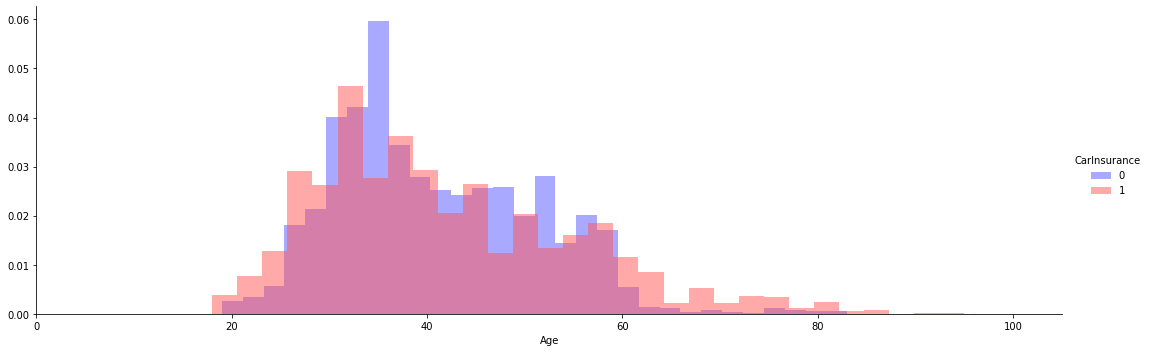

In [19]:
#lets take a further look at age
facet = sns.FacetGrid(Insurance_Data, hue='CarInsurance', size=5, aspect=3, palette='seismic')
facet.map(plt.hist, 'Age',bins=30,alpha=0.5,normed=True)
facet.set(xlim=(0,Insurance_Data.Age.max()+10))
facet.add_legend()

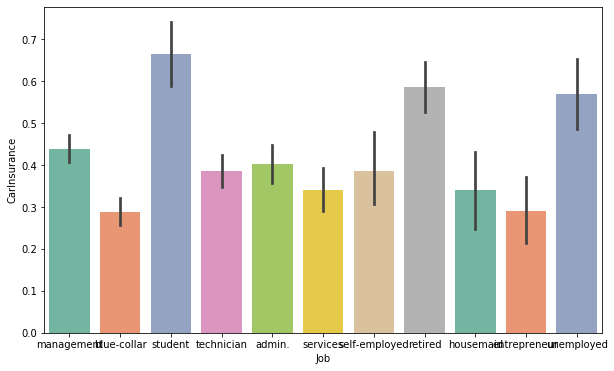

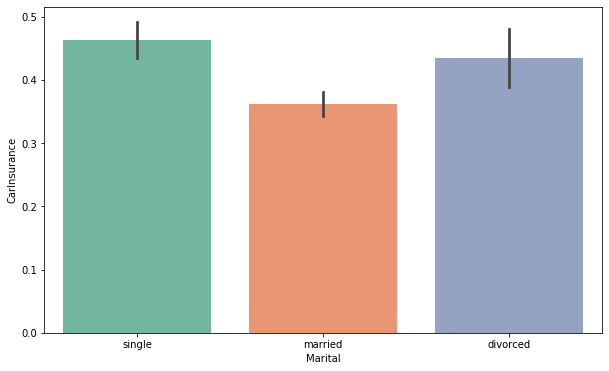

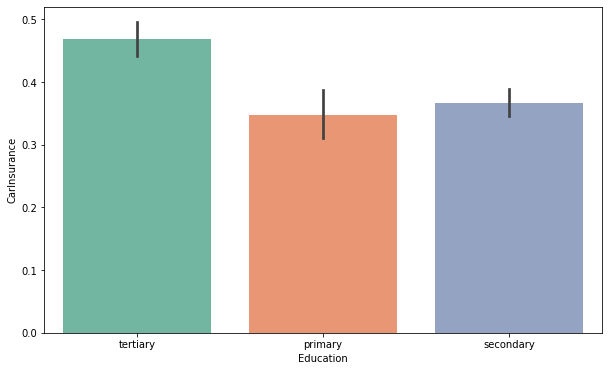

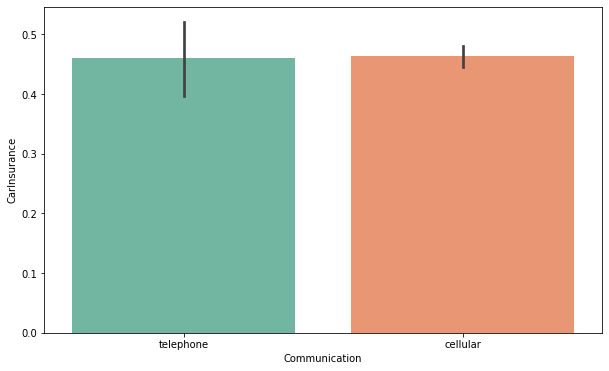

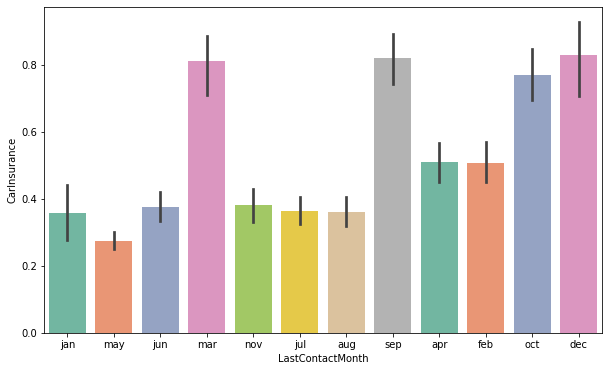

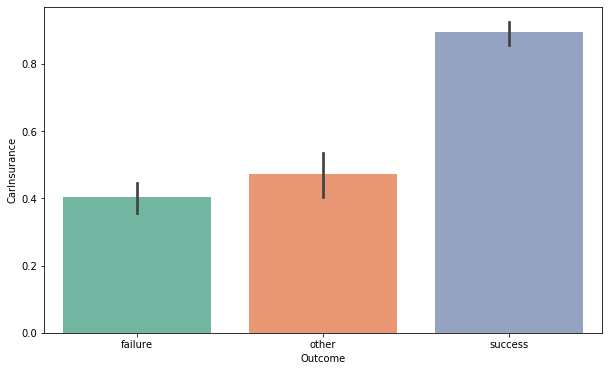

In [21]:
#vizualizing categorical features
categorical_col = Insurance_Data.select_dtypes(include=['object']).columns
#Excluding call start and call end variables
categorical_col_plot = categorical_col[(categorical_col!='CallStart') & (categorical_col!='CallEnd')]

#Looping over categorical variables and plotting
for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature, 'CarInsurance', data=Insurance_Data, palette='Set2')

In [24]:
#Remove outliers
Insurance_Data[Insurance_Data.Balance > 80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance


In [23]:
#removing above row
Insurance_Data = Insurance_Data.drop(Insurance_Data[Insurance_Data.index==1742].index)

# Handling Missing Data

In [25]:
#merge the train and test data to handle all missing values at once
merge_data = pd.concat([Insurance_Data,Insurance_test], keys=['train','test'])
#Removing CarInsurance and ID
merge_data.drop(['CarInsurance','Id'], axis=1, inplace=True)
#getting shape of the merged data
merge_data.shape


(4999, 17)

In [31]:
merge_data.isnull().sum()

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
dtype: int64

In [34]:
merge_data.isnull().count()

Age                 4999
Job                 4999
Marital             4999
Education           4999
Default             4999
Balance             4999
HHInsurance         4999
CarLoan             4999
Communication       4999
LastContactDay      4999
LastContactMonth    4999
NoOfContacts        4999
DaysPassed          4999
PrevAttempts        4999
Outcome             4999
CallStart           4999
CallEnd             4999
dtype: int64

In [35]:
NAs

,Total,Percentage
Age,0,0.000000
Job,24,0.004801
Marital,0,0.000000
Education,216,0.043209
Default,0,0.000000
Balance,0,0.000000
HHInsurance,0,0.000000
CarLoan,0,0.000000
Communication,1123,0.224645
LastContactDay,0,0.000000


In [30]:
#now check the missing data in each column and their percentage

#total missing values in every column
total_missing =merge_data.isnull().sum()

#calculate percentage
percentage = total_missing/merge_data.isnull().count()

#combine total in percentage values
NAs = pd.concat([total_missing,percentage],axis=1,keys=('Total','Percentage') )

#getting colums where there are missing values
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)


,Total,Percentage
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [36]:
total_missing

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
dtype: int64

# Replacing missing values

In [37]:
merge_data_df = merge_data.copy()

In [51]:
#check for missing values in Outcome
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [52]:
#creating a new category for outcome variable where days passed = -1
merge_data_df.loc[merge_data_df['DaysPassed']==-1,'Outcome'] = 'NoPrev'

In [55]:
merge_data_df.Outcome.value_counts(1)

NoPrev     0.759752
failure    0.109622
success    0.081016
other      0.049610
Name: Outcome, dtype: float64

In [54]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
NoPrev     3798
failure     548
other       248
success     405
Name: Age, dtype: int64

In [56]:
#Filling missing values for communication with none
merge_data_df['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [57]:
merge_data_df['Communication'].fillna('None', inplace=True)

In [58]:
merge_data_df.Communication.value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

Let us try to do mapping of Education to the Job since Job and Education are related

In [59]:
#Fill missing eduaction with the most common education level by job
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [98]:
#create job education level mode mapping
edu_mode=[]

#What are the different job types
job_types = merge_data_df.Job.value_counts().index

#checking which job is most frequent
merge_data_df.Job.value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [109]:
merge_data_df[merge_data_df.Job == 'housemaid']['Education'].value_counts().nlargest(1).index

Index(['primary'], dtype='object')

In [99]:
#now we will create a mapping where the job mode of education is there
#it means when there are many people in management job then what type of education they have taken

for job in job_types:
    mode = merge_data_df[merge_data_df.Job == job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)

In [110]:
edu_mode

array(['tertiary', 'secondary', 'secondary', 'secondary', 'secondary',
       'secondary', 'tertiary', 'secondary', 'secondary', 'tertiary',
       'primary'], dtype=object)

In [101]:
edu_map = pd.Series(edu_mode, index=merge_data_df.Job.value_counts().index)
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [112]:
#Apply the mapping to missing education obs. we will replace education now by jobs value
for j in job_types:
    merge_data_df.loc[(merge_data_df.Education.isnull()) & 
                      (merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]
    

In [113]:
#for those that are not getting mapped we will create a new category called None
merge_data_df.Education.fillna('None', inplace=True)

Treating 11 missing values in Job 

In [129]:
#how many jobs are null
merge_data_df['Job'].isnull().sum()

0

In [128]:
#Fill missing values with None
merge_data_df.Job.fillna('None', inplace=True)

In [130]:
#check if there are still any missing values in the data
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [131]:
#seperating the numerical and categorical data
numeric_dtypes = merge_data_df.select_dtypes(include=[np.number]).columns.tolist()

In [132]:
numeric_dtypes

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts']

In [133]:
merge_data_df_num = merge_data_df[numeric_dtypes]

In [135]:
categorical_dtypes = merge_data_df.select_dtypes(include=['object']).columns.tolist()

In [143]:
categorical_dtypes

['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome',
 'CallStart',
 'CallEnd']

In [146]:
merge_data_df_cat = merge_data_df[['Job','Marital','Education','Communication','LastContactMonth','Outcome']]

In [148]:
#create dummy variables
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [149]:
#combine numeric and dummy variables
Insurance_Data_dummy = pd.concat([merge_data_df_num,merge_data_df_cat_dummies], axis=1)

In [150]:
Insurance_Data_dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]